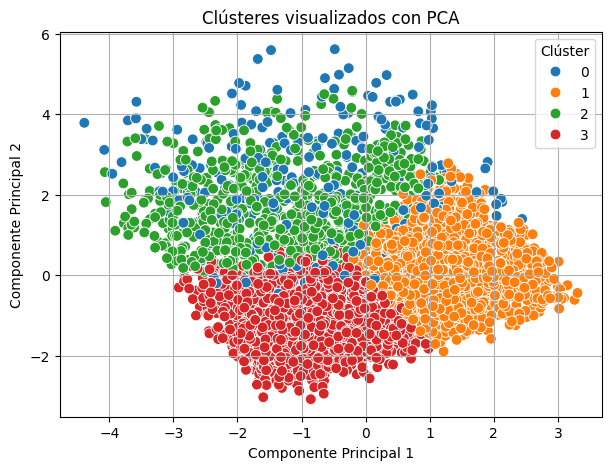


📊 Resumen promedio por clúster:
                  ID        Age  Experience      Income      ZIP Code  \
Cluster                                                                 
0        2461.165563  45.701987   20.572848  104.589404  93319.629139   
1        2508.226779  55.590909   30.269763   57.023715  93082.437253   
2        2479.879567  43.688769   18.694181  144.564276  93061.434371   
3        2506.432041  35.187597    9.937468   59.450129  93234.487855   

           Family     CCAvg  Education    Mortgage  Personal Loan  \
Cluster                                                             
0        2.460265  2.878974   1.927152   92.324503       0.463576   
1        2.394269  1.345257   1.978755   43.116601       0.033103   
2        1.828146  4.653938   1.393775  110.772666       0.284168   
3        2.605685  1.373736   1.957623   44.177261       0.032558   

         Securities Account  CD Account    Online  CreditCard  
Cluster                                          

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ------------------------------
# 1. Cargar datos
# ------------------------------
df = pd.read_csv('Marketing.csv')

# ------------------------------
# 2. Preprocesamiento
# ------------------------------
columns_to_drop = ['ID', 'ZIP Code', 'Personal Loan']
df_clustering = df.drop(columns=columns_to_drop)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_clustering)

# ------------------------------
# 3. KMeans con K definido
# ------------------------------
optimal_k = 4  # Puedes ajustar esto manualmente
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# ------------------------------
# 4. PCA para visualización
# ------------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=pca_result[:, 0], y=pca_result[:, 1],
    hue=df['Cluster'], palette='tab10', s=60
)
plt.title('Clústeres visualizados con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

# ------------------------------
# 5. Mostrar resumen por clúster
# ------------------------------
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("\n📊 Resumen promedio por clúster:")
print(cluster_summary)

# ------------------------------
# 6. Generar leyenda interpretativa básica
# ------------------------------
print("\n📌 Leyenda interpretativa (basada en promedios):")
for cluster_id, row in cluster_summary.iterrows():
    descripcion = []
    if row['Income'] > df['Income'].mean():
        descripcion.append("ingresos altos")
    else:
        descripcion.append("ingresos bajos")

    if row['Education'] >= 2:
        descripcion.append("nivel educativo alto")
    else:
        descripcion.append("nivel educativo bajo")

    if row['Online'] > 0.5:
        descripcion.append("uso frecuente de banca online")

    if row['CreditCard'] > 0.5:
        descripcion.append("uso frecuente de tarjeta de crédito")

    if row['Mortgage'] > 100:
        descripcion.append("hipotecas elevadas")

    if row['CCAvg'] > 2:
        descripcion.append("alto consumo con tarjeta")

    leyenda = ", ".join(descripcion)
    print(f"Clúster {cluster_id}: {leyenda}")